# Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Iris_dataset.csv')

In [3]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
df_setosa=df.loc[df['variety']=='Setosa'][['petal.length','petal.width']]

In [5]:
df_virginica=df.loc[df['variety']=='Virginica'][['petal.length','petal.width']]

In [6]:
df_versicolor=df.loc[df['variety']=='Versicolor'][['petal.length','petal.width']]

In [7]:
pw_s=50/150
pw_ver=50/150
pw_vir=50/150

### Calculating mean

In [8]:
mean_vir=df_virginica.mean(axis=0).to_numpy()

In [9]:
mean_vir

array([5.552, 2.026])

In [10]:
mean_s=df_setosa.mean().to_numpy()

In [11]:
mean_s

array([1.462, 0.246])

In [12]:
mean_ver=df_versicolor.mean().to_numpy()

In [13]:
mean_ver

array([4.26 , 1.326])

### Covariance

In [14]:
cov_vir=df_virginica.cov().to_numpy()

In [15]:
cov_vir

array([[0.30458776, 0.04882449],
       [0.04882449, 0.07543265]])

In [16]:
cov_ver=df_versicolor.cov().to_numpy()

In [17]:
cov_ver

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [18]:
cov_s=df_setosa.cov().to_numpy()

In [19]:
cov_s

array([[0.03015918, 0.00606939],
       [0.00606939, 0.01110612]])

### Finding discriminant function

In [20]:
def gi(x,mean,cov,p_w):
  t1=-0.5 *(np.subtract(x,mean)).T @ np.linalg.inv(cov) @ np.subtract(x,mean)
  t2=-0.5 *np.log(np.linalg.det(cov))
  t3=np.log(p_w)
  return t1+t2+t3

In [21]:
from sympy import Matrix, solve, symbols

In [22]:
x,y=symbols('x y')

In [23]:
M=Matrix([x,y])

In [24]:
M

Matrix([
[x],
[y]])

In [25]:
gs=gi(M,mean_s.reshape(2,1),cov_s,pw_s)
gver=gi(M,mean_ver.reshape(2,1),cov_ver,pw_ver)
gvir=gi(M,mean_vir.reshape(2,1),cov_vir,pw_vir)

In [26]:
gs

array([[(x - 1.462)*(-18.6273003135076*x + 10.1796382088151*y + 24.7289220589797) + (y - 0.246)*(10.1796382088151*x - 50.5832862978714*y - 2.43914263201131) + 2.96040480868607]],
      dtype=object)

In [27]:
gver

array([[(x - 4.26)*(-5.94072047539025*x + 11.1051355510113*y + 10.5820594845215) + (y - 1.326)*(11.1051355510113*x - 33.5448259804418*y - 2.8274381972424) + 1.75961463063611]],
      dtype=object)

In [28]:
gvir

array([[(x - 5.552)*(-1.83159812325961*x + 1.18551900602951*y + 7.76717127412155) + (y - 2.026)*(1.18551900602951*x - 7.39576745577215*y + 8.40182334391851) + 0.84281325680989]],
      dtype=object)

In [29]:
g1=np.subtract(gs[0][0],gver[0][0])

In [30]:
g1

-(x - 4.26)*(-5.94072047539025*x + 11.1051355510113*y + 10.5820594845215) + (x - 1.462)*(-18.6273003135076*x + 10.1796382088151*y + 24.7289220589797) - (y - 1.326)*(11.1051355510113*x - 33.5448259804418*y - 2.8274381972424) + (y - 0.246)*(10.1796382088151*x - 50.5832862978714*y - 2.43914263201131) + 1.20079017804997

In [31]:
g2=np.subtract(gver[0][0],gvir[0][0])

In [32]:
g3=np.subtract(gs[0][0],gvir[0][0])

In [42]:
solve(g1,(x,y))

[(-0.0729508940948375*y - 1.33919779811689*sqrt(-0.745885220950598*y**2 - 0.0565848556858378*y + 1) + 1.11510452422751,
  y),
 (-0.0729508940948375*y + 1.33919779811689*sqrt(-0.745885220950598*y**2 - 0.0565848556858378*y + 1) + 1.11510452422751,
  y)]

In [43]:
solve(g2,(x,y))

[(2.4140475008826*y - 2.29591620046275*sqrt(-0.101690645131943*y**2 - 0.409414614219547*y + 1) + 0.685033924322154,
  y),
 (2.4140475008826*y + 2.29591620046275*sqrt(-0.101690645131943*y**2 - 0.409414614219547*y + 1) + 0.685033924322154,
  y)]

In [44]:
solve(g3,(x,y))

[(0.535501231261876*y - 1.61558673547117*sqrt(-0.875278318788829*y**2 - 0.0801996077351771*y + 1) + 1.00988637406934,
  y),
 (0.535501231261876*y + 1.61558673547117*sqrt(-0.875278318788829*y**2 - 0.0801996077351771*y + 1) + 1.00988637406934,
  y)]

In [33]:
from sympy.plotting import plot_implicit

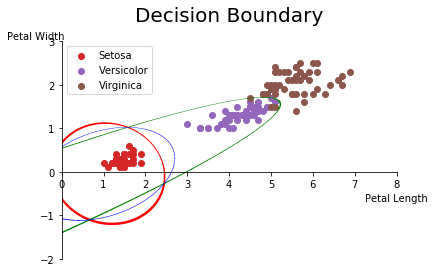

In [58]:
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

p1 = plot_implicit(g1, (x, 0, 8), (y, -2, 3), show=False, line_color='r',label="Setosa and versicolor")
p2 = plot_implicit(g2, (x, 0, 8), (y, -2, 3), show=False, line_color='g')
p3 = plot_implicit(g3, (x, 0, 8), (y, -2, 3), show=False, line_color='b')
p1.append(p2[0])
p1.append(p3[0])
fig, ax = plt.subplots()

move_sympyplot_to_axes(p1, ax)
plt.setp(ax.yaxis.get_label(), 'rotation', 0)

plt.scatter(df_setosa['petal.length'], df_setosa['petal.width'],label="Setosa")
plt.scatter(df_versicolor['petal.length'], df_versicolor['petal.width'],label="Versicolor")
plt.scatter(df_virginica['petal.length'], df_virginica['petal.width'],label="Virginica")

plt.title(label='Decision Boundary', fontsize='20', pad='20')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [54]:
y_values=np.arange(-2,4,0.1)

/home/rithic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/rithic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rithic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/rithic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/home/rithic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/home/rithic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


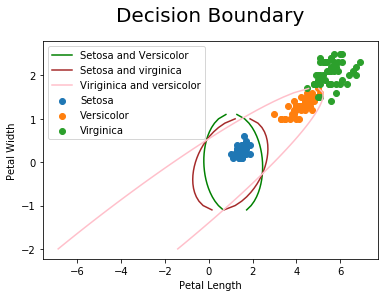

In [56]:
# Plotting the Decision Boundaries
plt.plot(-0.0729508940948392*y_values - 1.33919779811689*(np.sqrt(-0.745885220950602*y_values**2 - 0.0565848556858366*y_values + 1)) + 1.11510452422751, y_values, linestyle = '-', label = 'Setosa and Versicolor', color = 'green')
plt.plot(-0.0729508940948392*y_values + 1.33919779811689*(np.sqrt(-0.745885220950602*y_values**2 - 0.0565848556858366*y_values + 1)) + 1.11510452422751, y_values, linestyle = '-', color = 'green')

plt.plot(0.535501231261874*y_values - 1.61558673547117*(np.sqrt(-0.875278318788827*y_values**2 - 0.0801996077351771*y_values + 1)) + 1.00988637406934, y_values, linestyle = '-', label = 'Setosa and virginica', color = 'brown')
plt.plot(0.535501231261874*y_values + 1.61558673547117*(np.sqrt(-0.875278318788827*y_values**2 - 0.0801996077351771*y_values + 1)) + 1.00988637406934, y_values, linestyle = '-', color = 'brown')

plt.plot(2.4140475008826*y_values - 2.29591620046276*(np.sqrt(-0.101690645131938*y_values**2 - 0.409414614219551*y_values + 1)) + 0.685033924322147, y_values, linestyle = '-', label = 'Viriginica and versicolor', color = 'pink')
plt.plot(2.4140475008826*y_values + 2.29591620046276*(np.sqrt(-0.101690645131938*y_values**2 - 0.409414614219551*y_values + 1)) + 0.685033924322147, y_values, linestyle = '-', color = 'pink')

plt.scatter(df_setosa['petal.length'], df_setosa['petal.width'],label="Setosa")
plt.scatter(df_versicolor['petal.length'], df_versicolor['petal.width'],label="Versicolor")
plt.scatter(df_virginica['petal.length'], df_virginica['petal.width'],label="Virginica")

plt.title(label='Decision Boundary', fontsize='20', pad='20')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()